In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotting
import importlib
try:
    importlib.reload(plotting) # reload module
except NameError:
    pass

import joblib
from pathlib import Path

In [3]:
# columns that are used 
used_cols = [
    'Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec',
    'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
    'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
    'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',
    'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous'
]

# all numerical columns
num_cols = ['Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Epoch Date Close Approach',
    'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
    'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
    'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist',
    'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Orbit ID'
]

# label
label = ['Hazardous']

path = Path.cwd().parents[0] / 'input/nasa.csv'
df = pd.read_csv(path, usecols= used_cols)

# Check Data Size and Shape

In [4]:
df.iloc[:5, :12]

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity
0,21.6,127.219879,284.472297,788947200000,6.115834,0.419483,17,5,0.025282,4.634,2458000.5,0.425549
1,21.3,146.067964,326.617897,788947200000,18.113985,0.383014,21,3,0.186935,5.457,2458000.5,0.351674
2,20.3,231.502122,517.654482,789552000000,7.590711,0.050956,22,0,0.043058,4.557,2458000.5,0.348248
3,27.4,8.801465,19.680675,790156800000,11.173874,0.285322,7,6,0.005512,5.093,2458000.5,0.216578
4,21.6,127.219879,284.472297,790156800000,9.840831,0.407832,25,1,0.034798,5.154,2458000.5,0.210448


In [5]:
df.iloc[:5, 12:]

,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


# Check Label Count

In [6]:
df.loc[:, 'Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

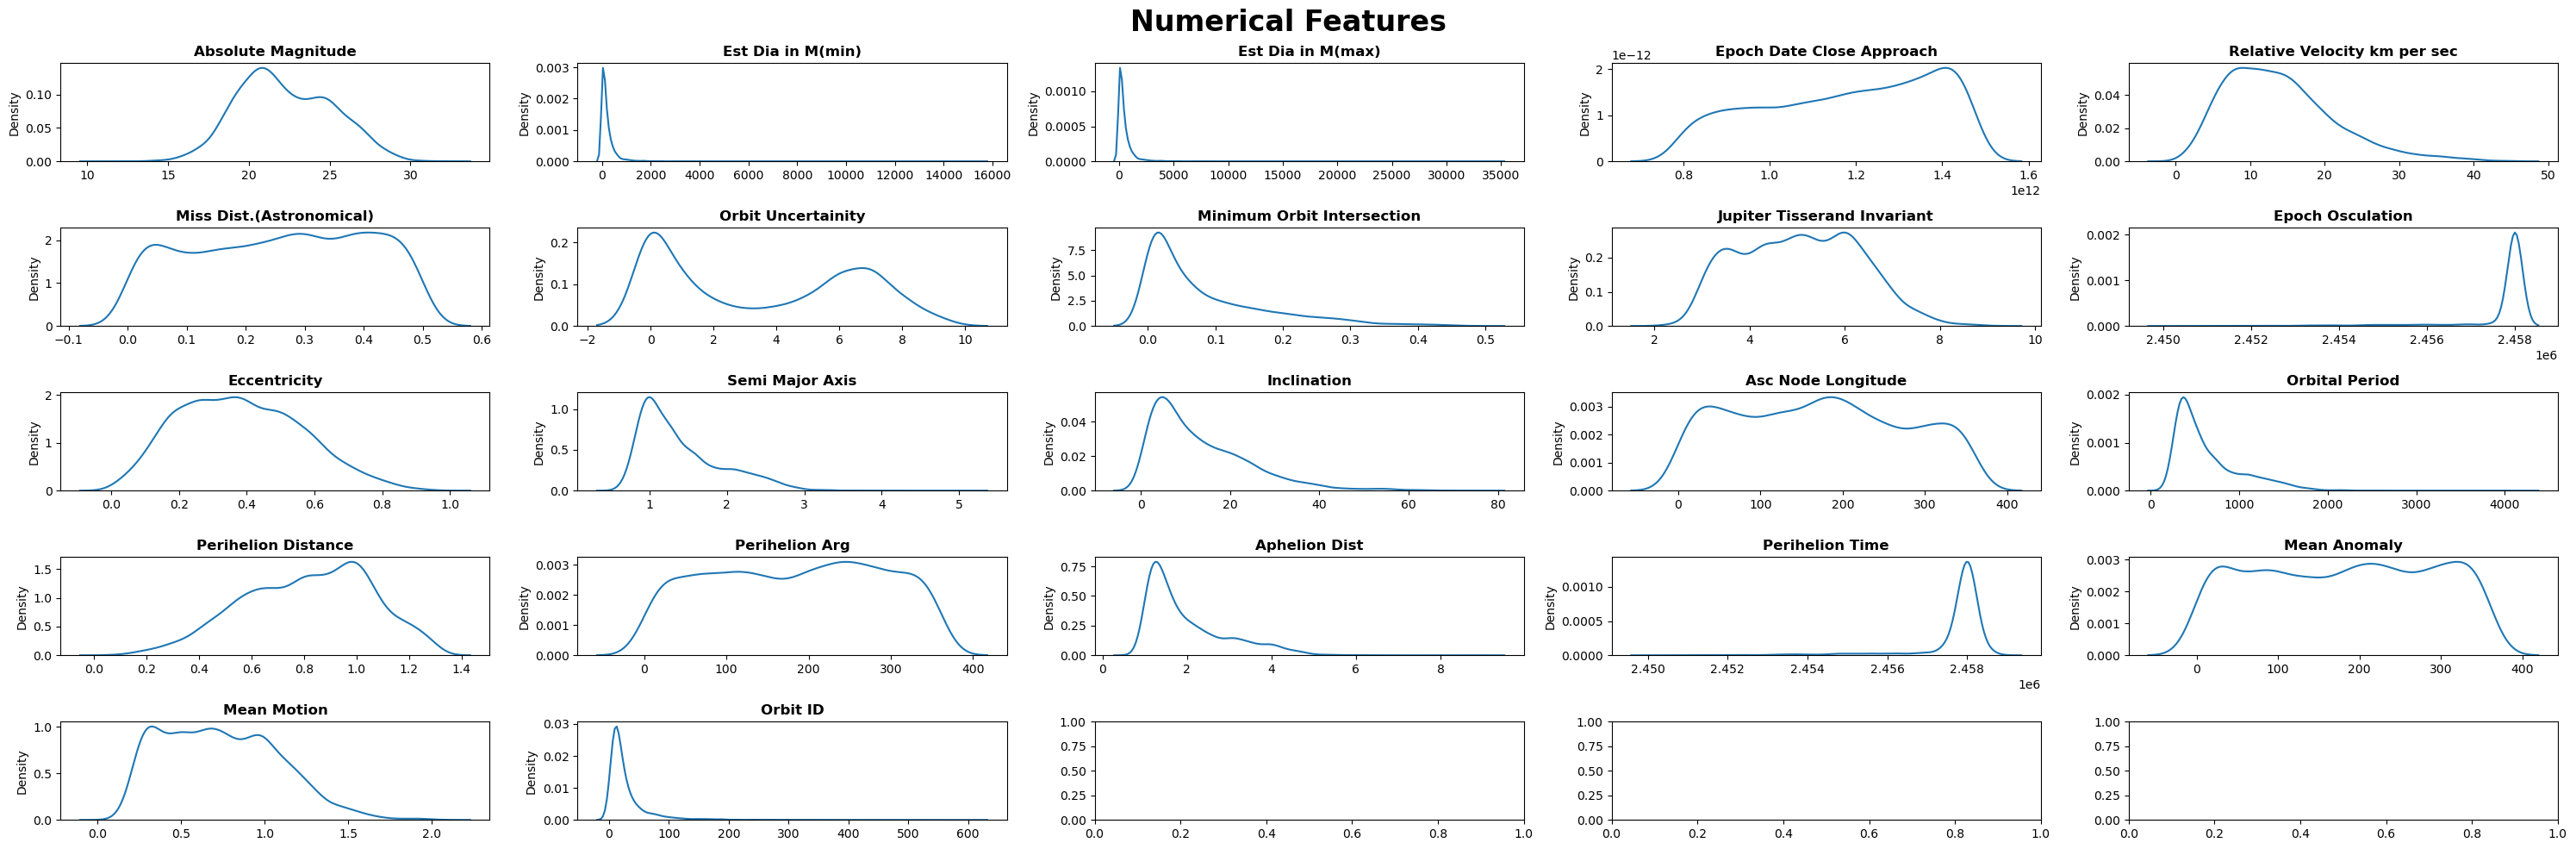

In [7]:
nrows= 5
ncols= int(np.ceil(len(num_cols)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)

import warnings
for (col, ax) in zip(num_cols, axs.reshape(-1)):
    
    # create plot
    # ignore userwarning stating that palette is ignored
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plotting.create_kdeplot(data= df, ax= ax, x= col)
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

plt.suptitle('Numerical Features', fontweight= 'bold', fontsize= 24)
fig.tight_layout()

plt.show()

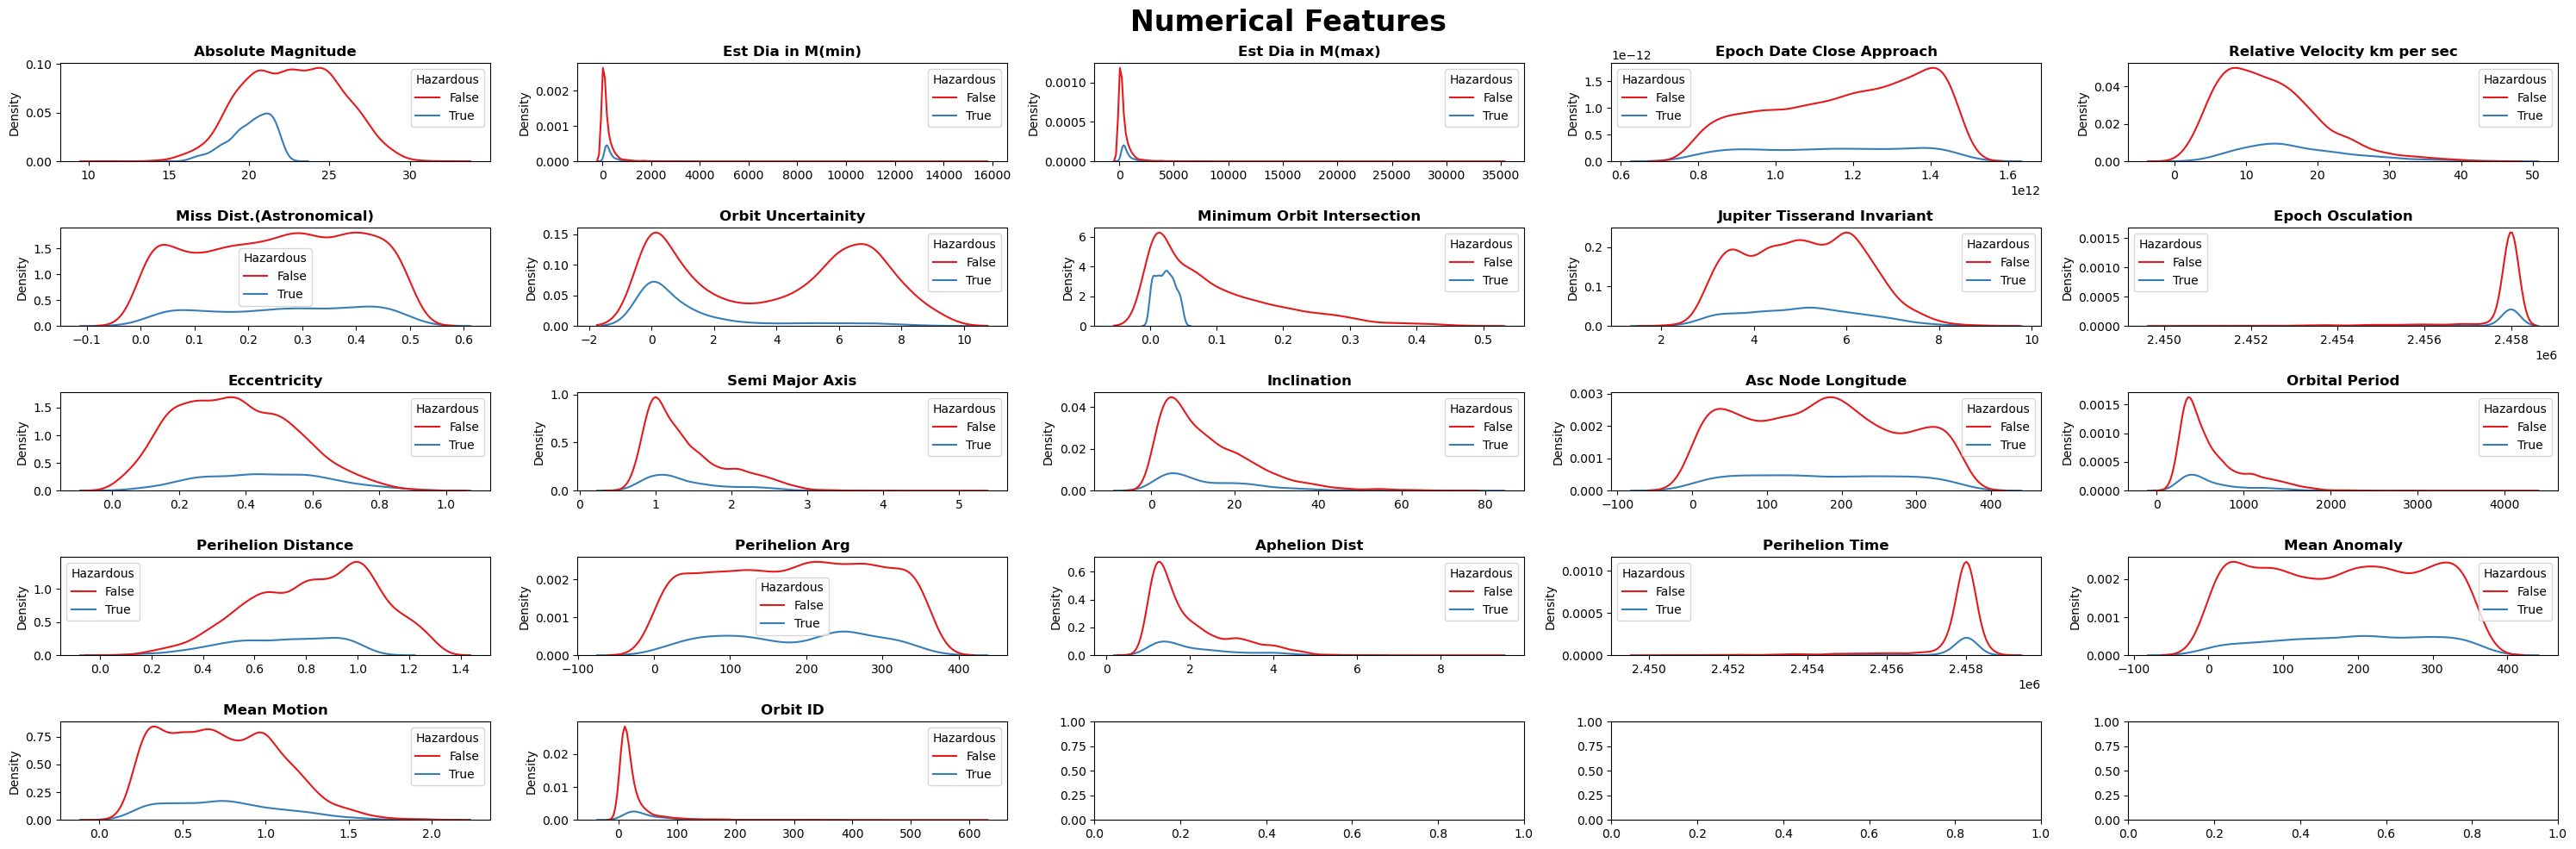

In [8]:
nrows= 5
ncols= int(np.ceil(len(num_cols)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)

import warnings
for (col, ax) in zip(num_cols, axs.reshape(-1)):
    
    # create plot
    # ignore userwarning stating that palette is ignored
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plotting.create_kdeplot(data= df, ax= ax, x= col, hue= 'Hazardous')
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

plt.suptitle('Numerical Features', fontweight= 'bold', fontsize= 24)
fig.tight_layout()

plt.show()

# Check Skewness of Features

In [9]:
from scipy.stats import skew

# get and sort absolute skewness
abs_skewness = abs(skew(df.loc[:, num_cols]))
abs_skewness = {k: v for k, v in 
    sorted(dict(zip(num_cols, abs_skewness)).items(), key = lambda x: x[1], reverse = True)
}

# print features with abs skewness > 0.5
print('Feature with absolute skewness > 0.5:')
for i, (k, v) in enumerate(abs_skewness.items()):
    if v > 0.5:
        print(f"{i + 1:2}) {k:<30} {v}")

Feature with absolute skewness > 0.5:
 1) Est Dia in M(max)              17.66445170545056
 2) Est Dia in M(min)              17.664451705450194
 3) Orbit ID                       4.844781718121247
 4) Epoch Osculation               4.031090851757636
 5) Perihelion Time                3.7238788338634965
 6) Orbital Period                 1.5275957812998597
 7) Minimum Orbit Intersection     1.4745129514859503
 8) Inclination                    1.3587529287985274
 9) Aphelion Dist                  1.3057099179276626
10) Semi Major Axis                1.1096149276236456
11) Relative Velocity km per sec   0.8875957302721954


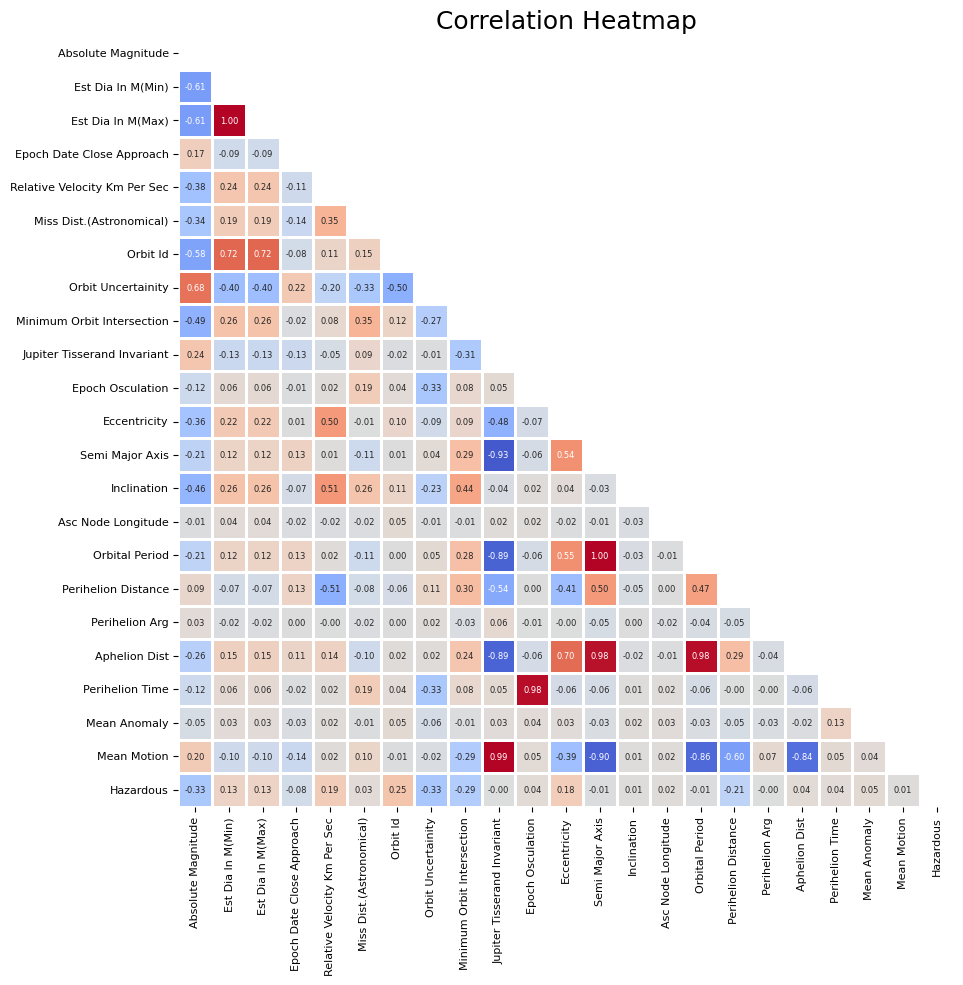

In [10]:
# display correlation
corr= df.corr()
plotting.create_corr_heatmap(corr)

In [11]:
corr_features_df= (corr
    .unstack()
    .reset_index()
    .rename(columns= {'level_0': 'feature_0', 'level_1': 'feature_1', 0: 'corr'})
    .sort_values('corr', key= lambda x: abs(x), ascending= False)
    .assign(features= lambda row: row.apply(lambda row: sorted([row['feature_0'], row['feature_1']]), axis=1))
    .drop_duplicates(subset= 'features', keep= 'first')
    .drop(columns= 'features')
    .loc[lambda df_: (df_['feature_0'] != df_['feature_1']) & (df_['corr'] > 0.95)]
)
corr_features_df

,feature_0,feature_1,corr
25,Est Dia in M(min),Est Dia in M(max),1.000000
291,Semi Major Axis,Orbital Period,0.995248
492,Mean Motion,Jupiter Tisserand Invariant,0.992680
429,Aphelion Dist,Orbital Period,0.977630
447,Perihelion Time,Epoch Osculation,0.977613
294,Semi Major Axis,Aphelion Dist,0.975326


In [12]:
corr_features= corr_features_df['feature_0'].values
corr_features

array(['Est Dia in M(min)', 'Semi Major Axis', 'Mean Motion',
       'Aphelion Dist', 'Perihelion Time', 'Semi Major Axis'],
      dtype=object)

We will exclude these features from our training and test set.

# Check Training and Test Set

## Normal Train Test Set

In [13]:
path_train = Path.cwd().parents[0] / 'input/train.csv'
path_test = Path.cwd().parents[0] / 'input/test.csv'

df_train= pd.read_csv(path_train)
df_test= pd.read_csv(path_test)

assert (df_train.columns == df_test.columns).all()

In [14]:
print(df_train['hazardous'].value_counts(normalize= True))
print(df_test['hazardous'].value_counts(normalize= True))

0    0.83889
1    0.16111
Name: hazardous, dtype: float64
0    0.839019
1    0.160981
Name: hazardous, dtype: float64


## Oversampled Train Test Set

In [15]:
path_train_smote = Path.cwd().parents[0] / 'input/smote_train.csv'
path_test = Path.cwd().parents[0] / 'input/test.csv'

df_train_smote= pd.read_csv(path_train_smote)
df_test= pd.read_csv(path_test)

assert (df_train_smote.columns == df_test.columns).all()

In [16]:
print(df_train_smote['hazardous'].value_counts(normalize= True))
print(df_test['hazardous'].value_counts(normalize= True))

0    0.5
1    0.5
Name: hazardous, dtype: float64
0    0.839019
1    0.160981
Name: hazardous, dtype: float64


# Visualize the Train Set After Feature Selection and Reduction

In [17]:
path= Path.cwd().parents[0] / 'model/knn_tuned.pkl'
model= joblib.load(path)
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['absolute_magnitude',
                                                   'epoch_date_close_approach',
                                                   'miss_dist._astronomical',
                                                   'orbit_uncertainity',
                                                   'jupiter_tisserand_invariant',
                                                   'eccentricity',
                                                   'asc_node_longitude',
                                                   'perihelion_distance',
                                                   'perihelion_arg',
                                                   '...
                                                   'orbital_period',
                                                   'minimum_orbit_intersection',
                                                   'inclination',
                                                   'relative_velocity_km_per_sec',
                                                   'orbit_id'])])),
                ('f_selection',
                 Pipeline(steps=[('select_k_best', SelectKBest(k=3))])),
                ('compression',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=8))])),
                ('prediction',
                 Pipeline(steps=[('model',
                                  KNeighborsClassifier(leaf_size=11,
                                                       n_neighbors=16,
                                                       weights='distance'))]))])

In [18]:
preprocessing_output= model[0].get_feature_names_out()
selected_feature_mask= model[1][0].get_support()
selected_feature= preprocessing_output[selected_feature_mask]

for feat in selected_feature:
    print(feat)

numerical__absolute_magnitude
numerical__orbit_uncertainity
numerical_skewed__minimum_orbit_intersection


In [44]:
path_train= Path.cwd().parents[0] / 'input/train.csv'
df_train= pd.read_csv(path_train)
X_train= df_train.drop(columns= 'hazardous')
y_train= df_train.loc[:, 'hazardous']

path_test= Path.cwd().parents[0] / 'input/test.csv'
df_test= pd.read_csv(path_test)
X_test= df_test.drop(columns= 'hazardous')
y_test= df_test.loc[:, 'hazardous']

In [47]:
X_train_transformed= model[:-1].fit_transform(X_train, y_train)
X_test_transformed= model[:-1].transform(X_test)

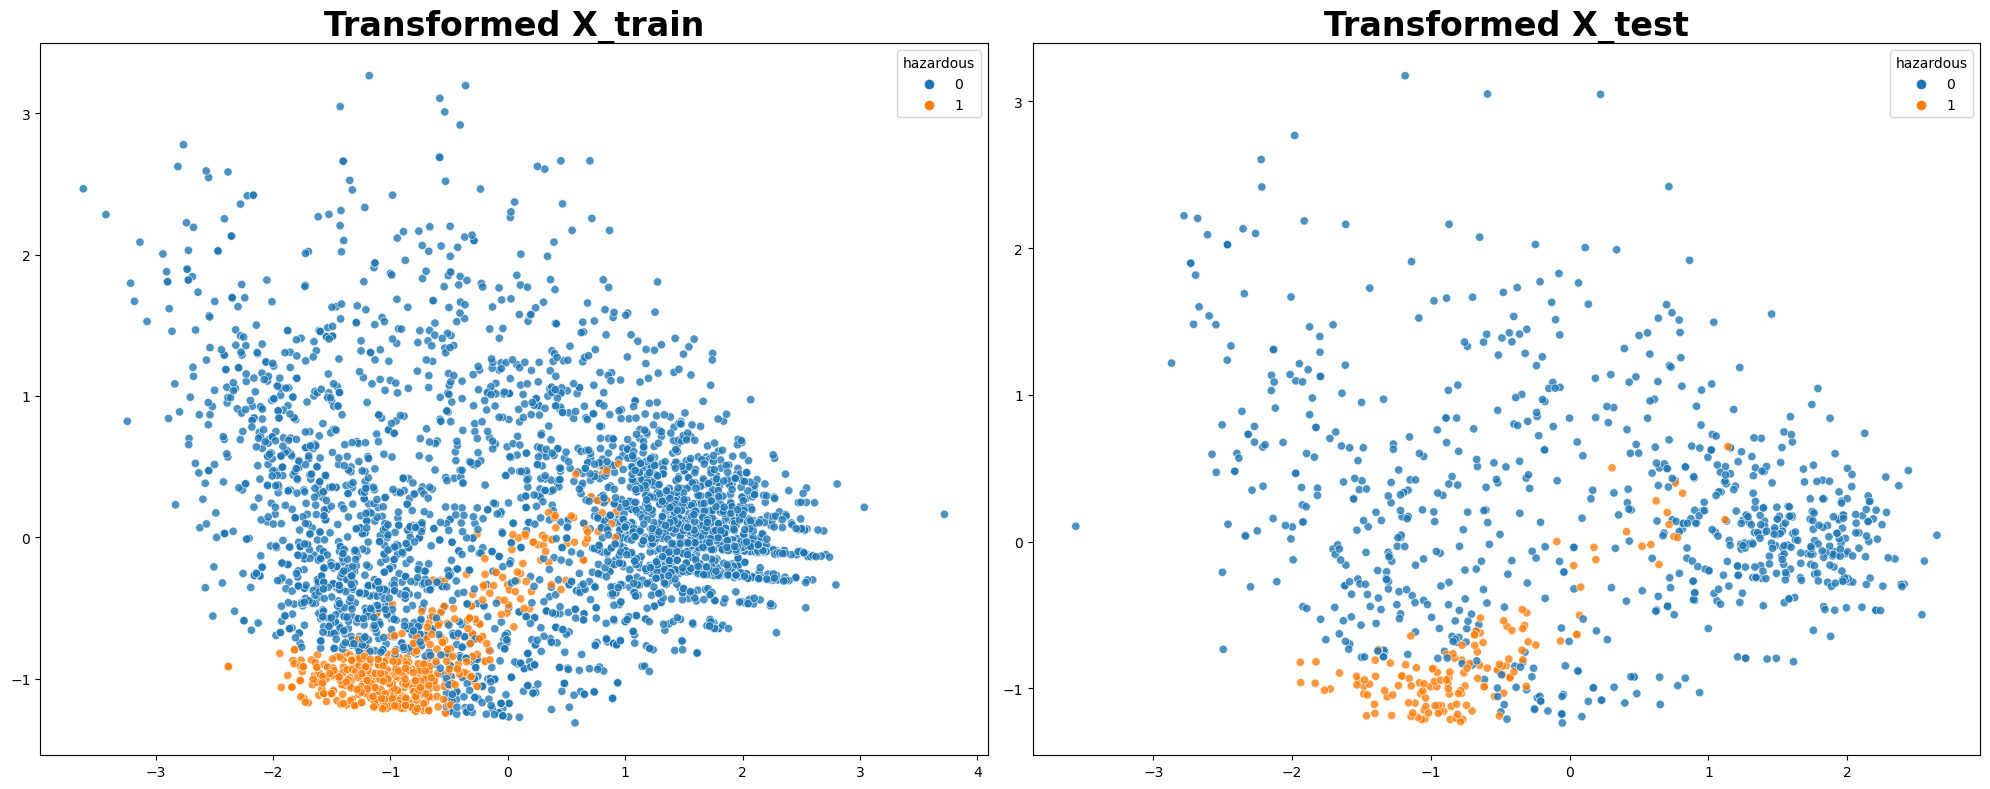

In [61]:
fig, axs= plt.subplots(ncols= 2, figsize= (20, 8))

sns.scatterplot(
    x= X_train_transformed[:, 0], 
    y= X_train_transformed[:, 1], 
    hue= y_train, 
    alpha= 0.8,
    ax= axs[0], 
)
axs[0].set_title('Transformed X_train', fontsize= 24, fontweight= 'bold')

sns.scatterplot(
    x= X_test_transformed[:, 0], 
    y= X_test_transformed[:, 1], 
    hue= y_test,
    alpha= 0.8,
    ax= axs[1],
)
axs[1].set_title('Transformed X_test', fontsize= 24, fontweight= 'bold')

plt.tight_layout()
plt.show()

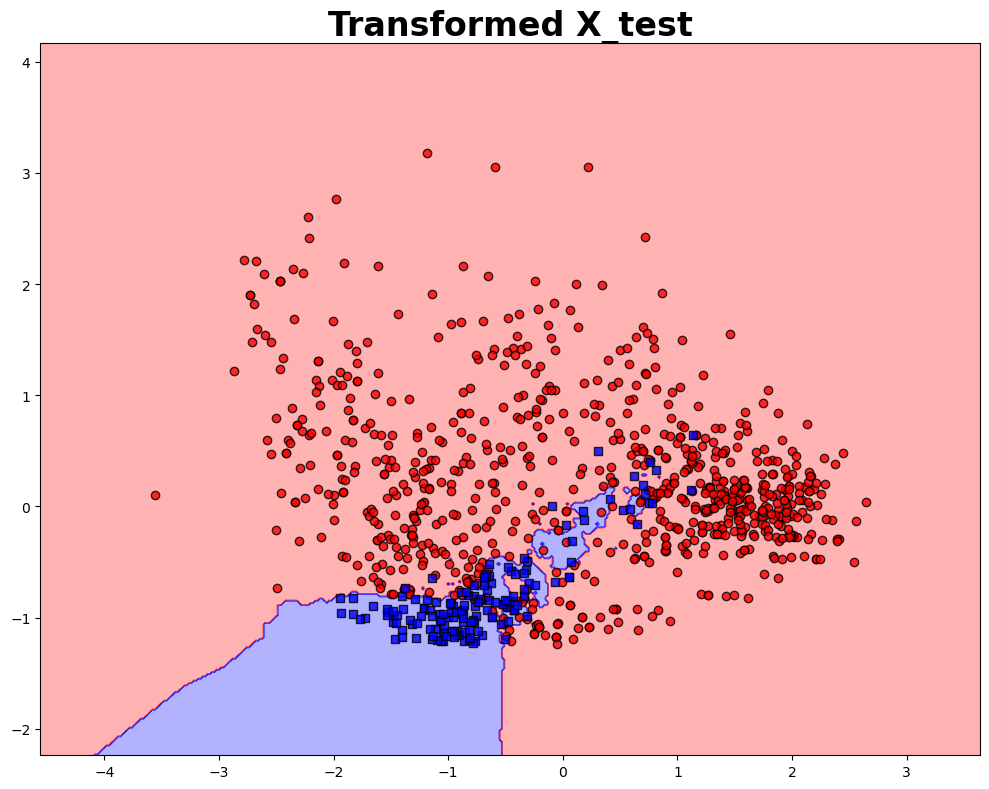

In [71]:
fig, ax= plt.subplots(figsize= (10, 8))

ax = plotting.plot_decision_regions(
    X= X_test_transformed,
    y= y_test,
    classifier= model[-1]
)
plt.title('Transformed X_test', fontsize= 24, fontweight= 'bold')

plt.tight_layout()
plt.show()